<a href="https://colab.research.google.com/github/JoDeMiro/TimeSeriesLearn/blob/main/13_TSLearn_Barycenters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Barycenters

This example shows three methods to compute barycenters of time series.
For an overview over the available methods see the :mod:`tslearn.barycenters`
module.

*tslearn* provides three methods for calculating barycenters for a given set of
time series:

* *Euclidean barycenter* is simply the arithmetic mean for
  each individual point in time, minimizing the summed euclidean distance
  for each of them. As can be seen below, it is very different from the
  DTW-based methods and may often be inappropriate. However, it is the
  fastest of the methods shown.
* *DTW Barycenter Averaging (DBA)* is an iteratively refined barycenter,
  starting out with a (potentially) bad candidate and improving it
  until convergence criteria are met. The optimization can be accomplished
  with (a) expectation-maximization [1] and (b) stochastic subgradient
  descent [2]. Empirically, the latter "is [often] more stable and finds better
  solutions in shorter time" [2].
* *Soft-DTW barycenter* uses a differentiable loss function to iteratively
  find a barycenter [3]. The method itself and the parameter
  $\gamma=1.0$ is described in more detail in the section on
  `DTW<dtw>`. There is also a dedicated
  `example<sphx_glr_auto_examples_clustering_plot_barycenter_interpolate.py>`
  available.

[1] F. Petitjean, A. Ketterlin & P. Gancarski. A global averaging method for
dynamic time warping, with applications to clustering. Pattern Recognition,
Elsevier, 2011, Vol. 44, Num. 3, pp. 678-693.

[2] D. Schultz & B. Jain. Nonsmooth Analysis and Subgradient Methods for
Averaging in Dynamic Time Warping Spaces. Pattern Recognition, 74, 340-358.

[3] M. Cuturi & M. Blondel. Soft-DTW: a Differentiable Loss Function for
Time-Series. ICML 2017.


In [1]:
!pip install -q tslearn

     |████████████████████████████████| 793 kB 5.1 MB/s 


In [4]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
import tslearn.barycenters.dba
from tslearn.barycenters.dba import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

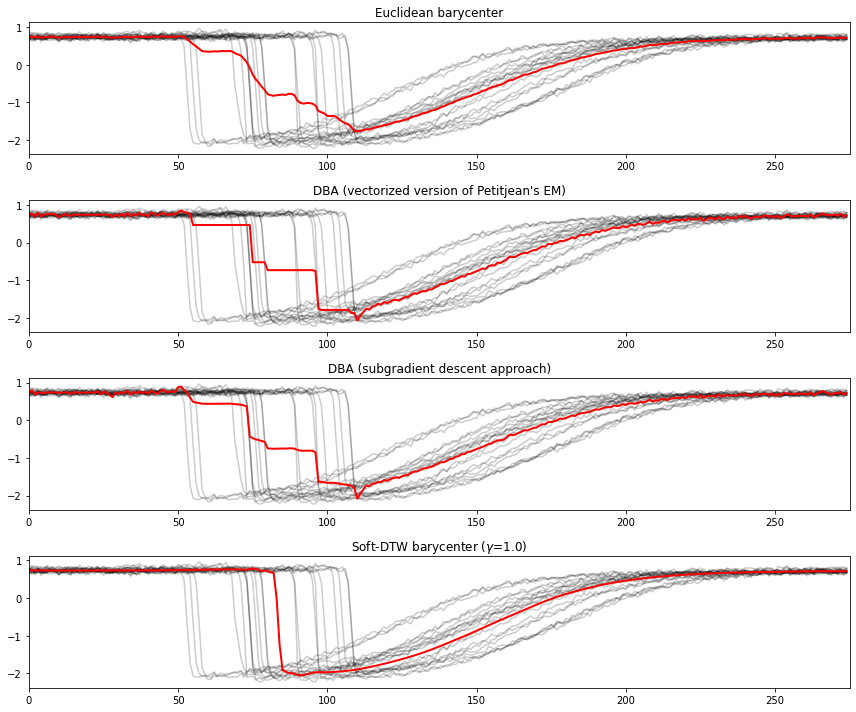

In [8]:
# Author: Romain Tavenard, Felix Divo
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.barycenters import \
    euclidean_barycenter, \
    dtw_barycenter_averaging, \
    dtw_barycenter_averaging_subgradient, \
    softdtw_barycenter
from tslearn.datasets import CachedDatasets

# fetch the example data set
numpy.random.seed(0)
X_train, y_train, _, _ = CachedDatasets().load_dataset("Trace")
X = X_train[y_train == 2]
length_of_sequence = X.shape[1]


def plot_helper(barycenter):
    # plot all points of the data set
    for series in X:
        plt.plot(series.ravel(), "k-", alpha=.2)
    # plot the given barycenter of them
    plt.plot(barycenter.ravel(), "r-", linewidth=2)


plt.figure(figsize=(12, 10))
# plot the four variants with the same number of iterations and a tolerance of
# 1e-3 where applicable
ax1 = plt.subplot(4, 1, 1)
plt.title("Euclidean barycenter")
plot_helper(euclidean_barycenter(X))

plt.subplot(4, 1, 2, sharex=ax1)
plt.title("DBA (vectorized version of Petitjean's EM)")
plot_helper(dtw_barycenter_averaging(X, max_iter=50, tol=1e-3))

plt.subplot(4, 1, 3, sharex=ax1)
plt.title("DBA (subgradient descent approach)")
plot_helper(dtw_barycenter_averaging_subgradient(X, max_iter=50, tol=1e-3))

plt.subplot(4, 1, 4, sharex=ax1)
plt.title("Soft-DTW barycenter ($\gamma$=1.0)")
plot_helper(softdtw_barycenter(X, gamma=1., max_iter=50, tol=1e-3))

# clip the axes for better readability
ax1.set_xlim([0, length_of_sequence])

# show the plot(s)
plt.tight_layout()
plt.show()